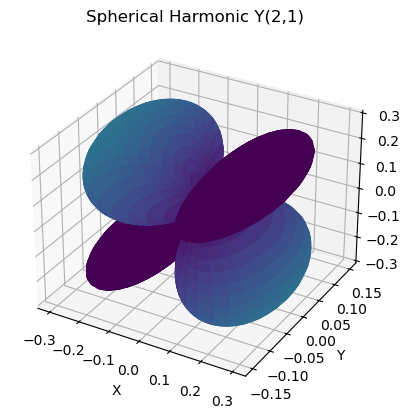

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
from matplotlib.animation import FuncAnimation

def spherical_harmonic_3d(l, m, resolution=100):
    """Generates 3D data for a spherical harmonic."""
    phi = np.linspace(0, 2 * np.pi, 2 * resolution)
    theta = np.linspace(0, np.pi, resolution)
    phi, theta = np.meshgrid(phi, theta)

    y = sph_harm(m, l, phi, theta)
    fcolors = np.real(y)

    r = np.abs(fcolors)
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)

    return x, y, z, fcolors

def create_rotatable_spherical_harmonic(l, m):
    """Creates a rotatable 3D plot of a spherical harmonic."""
    x, y, z, fcolors = spherical_harmonic_3d(l, m)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surface = ax.plot_surface(x, y, z, facecolors=plt.cm.viridis(fcolors), shade=False)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Spherical Harmonic Y({l},{m})')
    ax.set_aspect('auto')

    def rotate(angle):
        ax.view_init(elev=30, azim=angle)
        return surface,

    animation = FuncAnimation(fig, rotate, frames=np.arange(0, 360, 2), interval=50, blit=False)

    plt.show()

# Example usage:
create_rotatable_spherical_harmonic(2, 1)

In [9]:
def interactive_spherical_harmonic(l, m):
    """Creates an interactive 3D plot of a spherical harmonic."""
    x, y, z, fcolors = spherical_harmonic_3d(l, m)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surface = ax.plot_surface(x, y, z, facecolors=plt.cm.viridis(fcolors), shade=False)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Spherical Harmonic Y({l},{m})')
    ax.set_aspect('auto')

    def rotate(event):
        if event.button == 1:  # Left mouse button
            ax.view_init(elev=ax.elev + event.ydata, azim=ax.azim - event.xdata)
            fig.canvas.draw_idle()

    fig.canvas.mpl_connect('button_press_event', lambda event: setattr(ax, 'button_pressed', event.button))
    fig.canvas.mpl_connect('motion_notify_event', rotate)

    anim = plt.show()

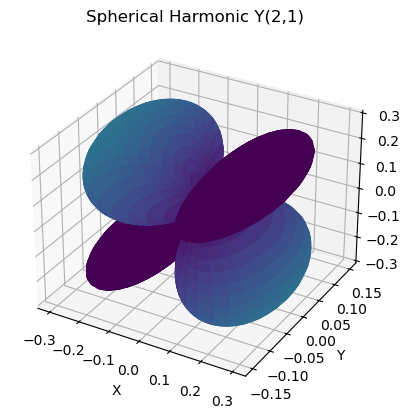

In [11]:
interactive_spherical_harmonic(2, 1)

In [17]:
def interactive_spherical_harmonic(l, m):
    """Creates an interactive 3D plot of a spherical harmonic."""
    x, y, z, fcolors = spherical_harmonic_3d(l, m)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surface = ax.plot_surface(x, y, z, facecolors=plt.cm.viridis(fcolors), shade=False)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Spherical Harmonic Y({l},{m})')
    ax.set_aspect('auto')

    def rotate(event):
        if event.button == 1:  # Left mouse button
            if hasattr(ax, 'button_pressed'):
                ax.view_init(elev=ax.elev - (event.ydata - ax.mouse_y), azim=ax.azim + (event.xdata - ax.mouse_x))
                fig.canvas.draw_idle()
                ax.mouse_x = event.xdata
                ax.mouse_y = event.ydata

    def press(event):
        if event.button == 1:
            ax.button_pressed = True
            ax.mouse_x = event.xdata
            ax.mouse_y = event.ydata

    def release(event):
        if event.button == 1:
            if hasattr(ax, 'button_pressed'):
                del ax.button_pressed

    fig.canvas.mpl_connect('button_press_event', press)
    fig.canvas.mpl_connect('motion_notify_event', rotate)
    fig.canvas.mpl_connect('button_release_event', release)

    plt.show()

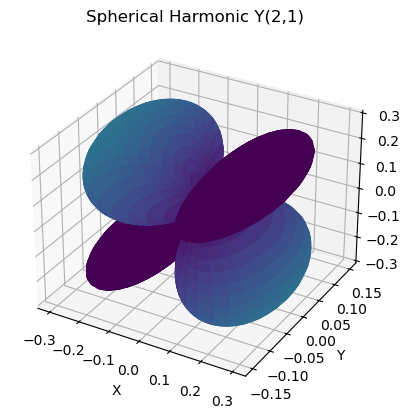

In [19]:
interactive_spherical_harmonic(2, 1)

In [23]:
def interactive_spherical_harmonic(l, m):
    """Creates an interactive 3D plot of a spherical harmonic."""
    x, y, z, fcolors = spherical_harmonic_3d(l, m)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surface = ax.plot_surface(x, y, z, facecolors=plt.cm.viridis(fcolors), shade=False)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Spherical Harmonic Y({l},{m})')
    ax.set_aspect('auto')

    def on_move(event):
        if event.inaxes == ax and event.button == 1:
            dx = event.xdata - on_move.x0
            dy = event.ydata - on_move.y0
            ax.azim -= dx
            ax.elev += dy
            on_move.x0 = event.xdata
            on_move.y0 = event.ydata
            fig.canvas.draw_idle()

    def on_press(event):
        if event.inaxes == ax and event.button == 1:
            on_move.x0 = event.xdata
            on_move.y0 = event.ydata

    fig.canvas.mpl_connect('motion_notify_event', on_move)
    fig.canvas.mpl_connect('button_press_event', on_press)

    plt.show()


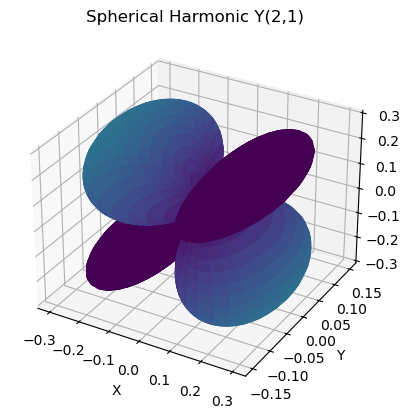

In [25]:
interactive_spherical_harmonic(2, 1)

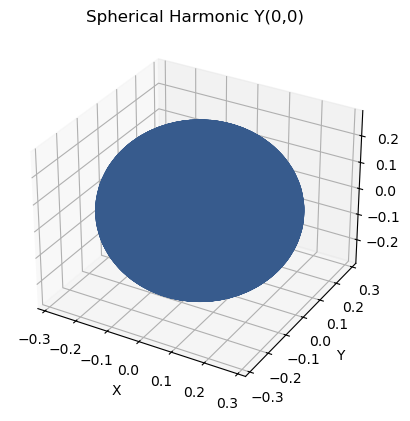

In [27]:
interactive_spherical_harmonic(0, 0)

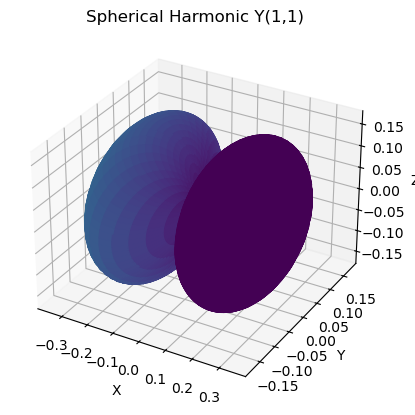

In [29]:
interactive_spherical_harmonic(1, 1)

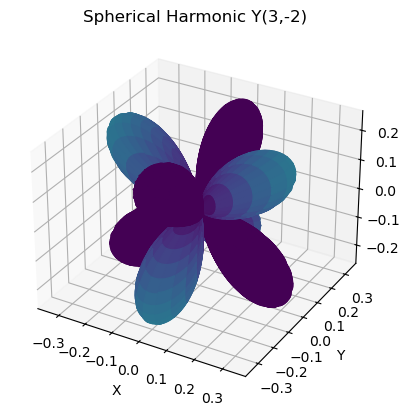

In [31]:
interactive_spherical_harmonic(3, -2)